<a href="https://colab.research.google.com/github/mahluwal/Tensorflow/blob/master/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation with a polynomial Model
$y=f(x)=\sin x$ <br />
Approximate this function with a polynomial function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def fx(x):
    y = np.sin(x)
    return y

In [ ]:
def generateX_fx(N):
    x = np.random.random(N)*2*np.pi
    yd = fx(x)
    return x, yd

In [ ]:
x, yd = generateX_fx(20)

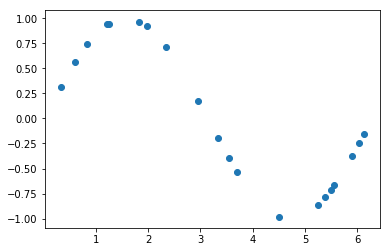

In [ ]:
plt.scatter(x, yd)

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [ ]:
def createA(x, D):
    A = np.ones((D+1))
    for d in range(1, D+1):
        A[d] = np.power(x, d)/np.power(2*np.pi, d)
    return A

In [ ]:
def init_w(D):
    w = (2*np.random.random(D+1, )-1)
    return w

In [ ]:
def predict_y(w, x):
    D = w.shape[0] -1
    A = createA(x, D)
    yhat = A.dot(w)
    return yhat

In [ ]:
def compute_mse(y, yd):
    mse = (y-yd)**2
    return mse

In [ ]:
def calc_dw(x, yhat, y, D):
    dw = np.zeros(D+1, )
    com = -2*(y-yhat)
    dw[0]+=com
    for d in range(1, D+1):
        dw[d] +=com*np.power(x, d)/np.power(2*np.pi, d)
    return dw

In [ ]:
def update_w(w, dw, eta):
    w = w-dw*eta
    return w

In [ ]:
def train_w(x, yd, w, Nepoch, eta):
    N = x.shape[0]
    D = w.shape[0]-1
    for epoch in range(Nepoch):
        for s in range(N):
            yhat = predict_y(w, x[s])
            dw = calc_dw(x[s], yhat, yd[s], D)
            w = update_w(w, dw, eta)
    return w

In [ ]:
def trainmodel(N, D):
    x, yd = generateX_fx(N)
    w = init_w(D)
    Nepoch = 1000
    eta = 0.01
    w = train_w(x, yd, w, Nepoch, eta)
    mse = 0
    y = []
    for  s in range(N):
        y.append(predict_y(w, x[s]))
        mse+= compute_mse(y[s], yd[s])
    mse = mse/N
    y = np.array(y)
    return x, y, yd, w, mse

In [ ]:
x, y, yd, w, mse = trainmodel(50, 8)

In [ ]:
mse

0.05068381265836933

In [ ]:
def plotmodel(x, y, yd):
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.legend(['estimated', 'true'])
    plt.xlim([0, 7])
    plt.title("comparision")

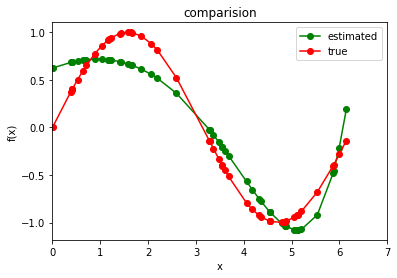

In [ ]:
plotmodel(x, y, yd)